In [ ]:
# ✅ 1. Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import itertools


In [34]:

from google.colab import drive
drive.mount('/content/drive')





Mounted at /content/drive


In [4]:
data_dir = '/content/drive/MyDrive/MyDataSet'

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/MyDataSet/',  # ✅ Update this to your dataset path
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/MyDataSet/',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 5668 images belonging to 15 classes.
Found 1410 images belonging to 15 classes.


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

class_names = list(train_data.class_indices.keys())


Found 5668 images belonging to 15 classes.
Found 1410 images belonging to 15 classes.


In [9]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense

base_model = MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,277,199 (8.69 MB)

 Trainable params: 19,215 (75.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [10]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 2753s 15s/step - accuracy: 0.4952 - loss: 1.6456 - val_accuracy: 0.7518 - val_loss: 0.7014
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.8073 - loss: 0.5844 - val_accuracy: 0.8213 - val_loss: 0.5371
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.8647 - loss: 0.4233 - val_accuracy: 0.8411 - val_loss: 0.4490
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 366s 2s/step - accuracy: 0.8747 - loss: 0.3634 - val_accuracy: 0.8631 - val_loss: 0.4135
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.8844 - loss: 0.3346 - val_accuracy: 0.8624 - val_loss: 0.3981
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 370s 2s/step - accuracy: 0.8967 - loss: 0.2982 - val_accuracy: 0.8532 - val_loss: 0.3902
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - accuracy: 0.8909 - loss: 0.2976 - val_accuracy: 0.8645 - val_loss: 0.3464
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 381s 2s/step - accuracy: 0.9024 - loss: 0.2806 - val_ac

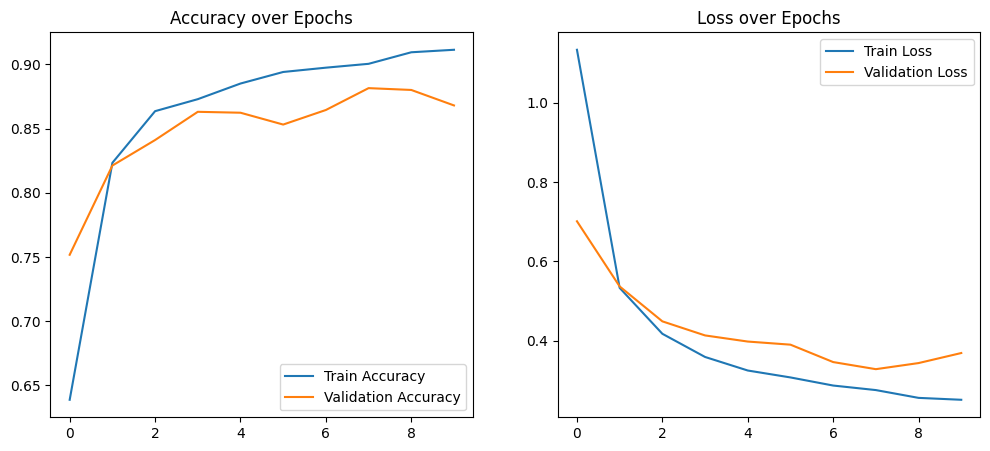

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


45/45 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step
Classification Report:

                                       precision    recall  f1-score   support

                 POTASSIUM DEFICIENCY       0.23      0.24      0.23       306
           RESIZED BACTERIAL SOFT ROT       0.15      0.16      0.15       215
                RESIZED BANANA APHIDS       0.08      0.08      0.08        73
RESIZED BANANA FRUIT- SCARRING BEETLE       0.00      0.00      0.00        30
                      RESIZED BHIMKOL       0.02      0.03      0.02        80
               RESIZED BLACK SIGATOKA       0.06      0.09      0.07        94
                 RESIZED JAHAJI FRUIT       0.00      0.00      0.00         8
                  RESIZED JAHAJI LEAF       0.09      0.06      0.07        67
                  RESIZED JAHAJI STEM       0.06      0.05      0.06        40
                RESIZED KACHKOL FRUIT       0.00      0.00      0.00         6
                RESIZED MALBHOG FRUIT       0.08      0.07      0.0

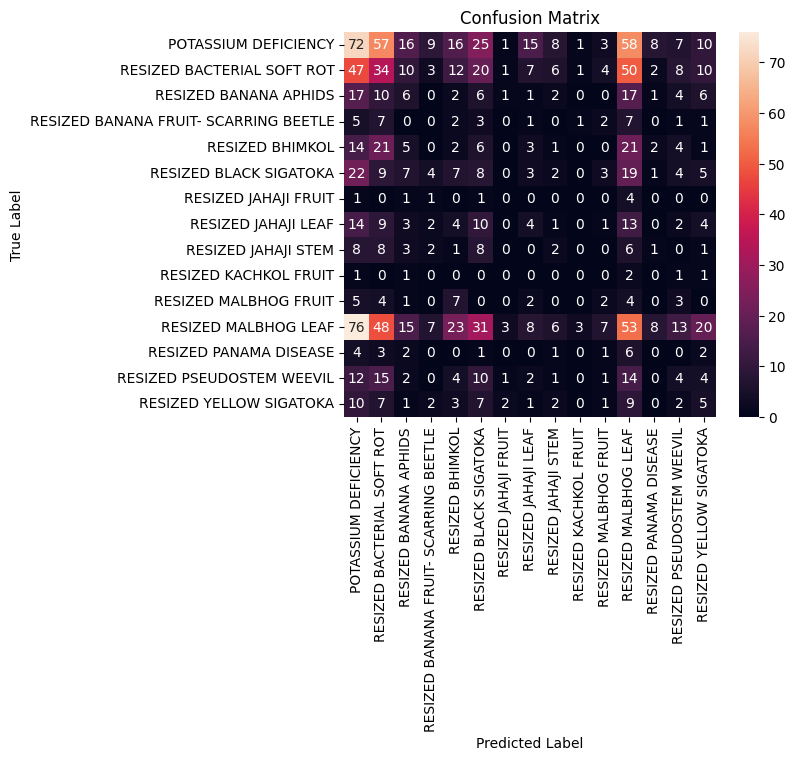

In [12]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

val_data.reset()
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)

print("Classification Report:\n")
print(classification_report(val_data.classes, y_pred, target_names=class_names))

cm = confusion_matrix(val_data.classes, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


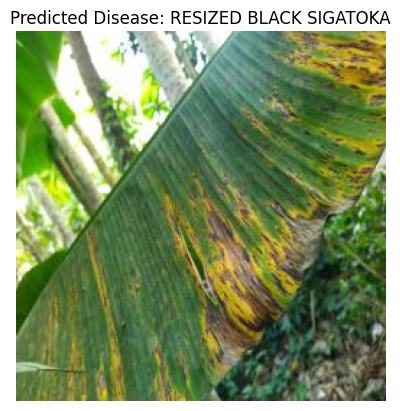

Predicted Disease: RESIZED BLACK SIGATOKA


In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
import numpy as np
import os

image_path = '/content/drive/MyDrive/Test_Images/sample3.jpg'

img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

# Display image and prediction
plt.imshow(mpimg.imread(image_path))
plt.axis('off')
plt.title(f"Predicted Disease: {predicted_class}")
plt.show()

print(f"Predicted Disease: {predicted_class}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


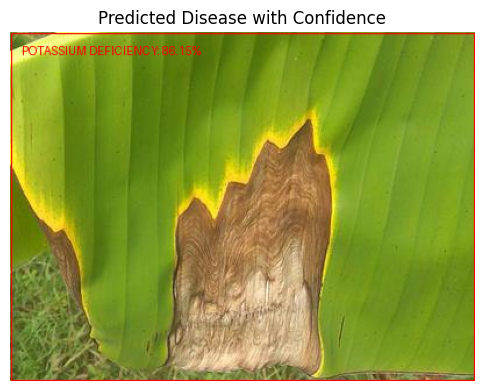

In [15]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# ✅ Load the image
img_path = '/content/drive/MyDrive/Test_Images/sample5.jpg'  # 🔁 Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_expanded = np.expand_dims(img_array, axis=0)

# ✅ Predict the class
predictions = model.predict(img_expanded)
predicted_class_index = np.argmax(predictions)
confidence = predictions[0][predicted_class_index] * 100
predicted_class_name = class_names[predicted_class_index]

# ✅ Load original image for annotation
original_image = Image.open(img_path).convert("RGB")
draw = ImageDraw.Draw(original_image)

# ✅ Load font
try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 24)
except:
    font = ImageFont.load_default()

# ✅ Label with disease name and percentage
label_text = f"{predicted_class_name}: {confidence:.2f}%"

# ✅ Draw a thin red border (1px)
border_thickness = 1
draw.rectangle(
    [border_thickness, border_thickness, original_image.width - border_thickness, original_image.height - border_thickness],
    outline="red",
    width=border_thickness
)

# ✅ Draw label text in top-left corner
draw.text((10, 10), label_text, fill="red", font=font)

# ✅ Display final result
plt.figure(figsize=(6, 6))
plt.imshow(original_image)
plt.axis("off")
plt.title("Predicted Disease with Confidence")
plt.show()


In [27]:
from google.colab import files
uploaded = files.upload()


Saving sample5.jpg to sample5 (1).jpg


In [28]:
image_path = "sample5.jpg"  # Replace with actual uploaded filename


In [29]:
image_path = "/content/sample5.jpg"  # <-- Update this to your actual file
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"❌ Image not found: {image_path}")


In [30]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


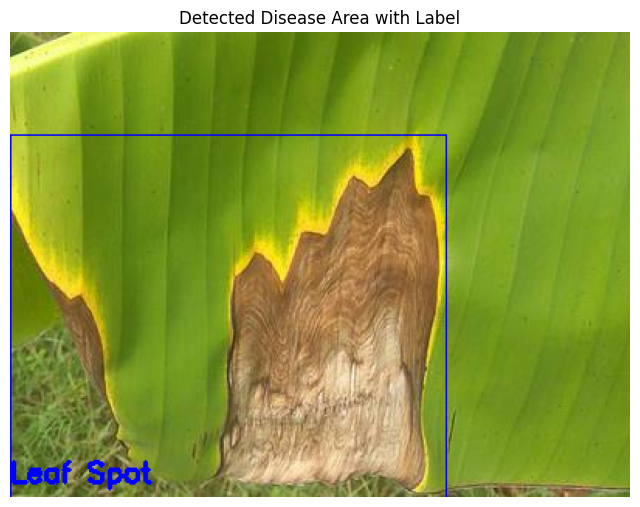

In [31]:
import cv2
import matplotlib.pyplot as plt

image_path = "/content/sample5.jpg"  # Replace with your actual file name
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"❌ Image not found: {image_path}")

predicted_class = "Leaf Spot"  # Replace with model prediction if needed

# Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Mask for brownish/yellow infected areas
lower_brown = (10, 50, 50)
upper_brown = (30, 255, 255)
mask = cv2.inRange(hsv, lower_brown, upper_brown)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    x_min, y_min = float('inf'), float('inf')
    x_max, y_max = 0, 0

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w * h > 500:
            x_min = min(x_min, x)
            y_min = min(y_min, y)
            x_max = max(x_max, x + w)
            y_max = max(y_max, y + h)

    if x_max > x_min and y_max > y_min:
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 1)
        label_y = y_max + 20 if y_max + 20 < image.shape[0] else y_max - 10
        cv2.putText(image, predicted_class, (x_min, label_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Display final result
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Detected Disease Area with Label")
plt.show()


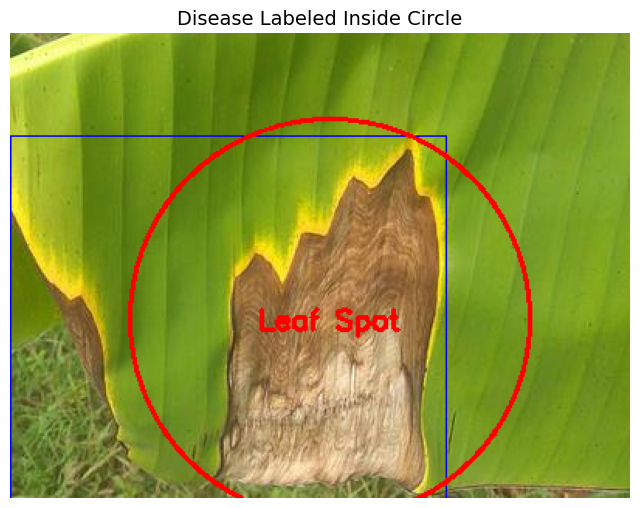

In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load image
image_path = "/content/sample5.jpg"  # Replace with your image
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"❌ Image not found: {image_path}")

predicted_class = "Leaf Spot"  # Replace this with actual model prediction

# Convert to HSV and mask brown/yellow areas
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_brown = (10, 50, 50)
upper_brown = (30, 255, 255)
mask = cv2.inRange(hsv, lower_brown, upper_brown)

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

x_min, y_min, x_max, y_max = float('inf'), float('inf'), 0, 0
largest_contour = None
max_area = 0

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    area = w * h
    if area > 500:
        x_min = min(x_min, x)
        y_min = min(y_min, y)
        x_max = max(x_max, x + w)
        y_max = max(y_max, y + h)
        if area > max_area:
            max_area = area
            largest_contour = cnt

# Draw blue bounding box for full infection area
if x_max > x_min and y_max > y_min:
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 1)

# Draw red circle for major defect & place label inside it
if largest_contour is not None:
    (cx, cy), radius = cv2.minEnclosingCircle(largest_contour)
    center = (int(cx), int(cy))
    radius = int(radius)

    # Draw red circle
    cv2.circle(image, center, radius, (0, 0, 255), 2)

    # Put label inside the circle
    text_size, _ = cv2.getTextSize(predicted_class, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
    text_x = int(cx - text_size[0] // 2)
    text_y = int(cy + text_size[1] // 2)
    cv2.putText(image, predicted_class, (text_x, text_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

# Display result
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Disease Labeled Inside Circle", fontsize=14)
plt.show()


In [42]:
from tensorflow.keras.models import load_model

# ✅ Update the path if the model is in Google Drive
model = load_model('/content/drive/MyDrive/Banana_Disease/BananaClassifiers.h5')  # Replace with correct path


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


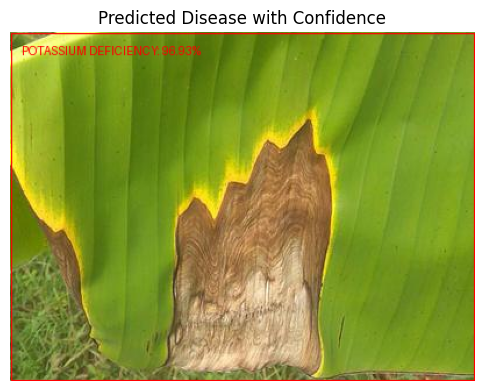

In [50]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# ✅ Load the image
img_path = '/content/drive/MyDrive/Test_Images/sample5.jpg'  # 🔁 Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_expanded = np.expand_dims(img_array, axis=0)

# ✅ Predict the class
predictions = model.predict(img_expanded)
predicted_class_index = np.argmax(predictions)
confidence = predictions[0][predicted_class_index] * 100
predicted_class_name = class_names[predicted_class_index]

# ✅ Load original image for annotation
original_image = Image.open(img_path).convert("RGB")
draw = ImageDraw.Draw(original_image)

# ✅ Load font
try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 24)
except:
    font = ImageFont.load_default()

# ✅ Label with disease name and percentage
label_text = f"{predicted_class_name}: {confidence:.2f}%"

# ✅ Draw a thin red border (1px)
border_thickness = 1
draw.rectangle(
    [border_thickness, border_thickness, original_image.width - border_thickness, original_image.height - border_thickness],
    outline="red",
    width=border_thickness
)

# ✅ Draw label text in top-left corner
draw.text((10, 10), label_text, fill="red", font=font)

# ✅ Display final result
plt.figure(figsize=(6, 6))
plt.imshow(original_image)
plt.axis("off")
plt.title("Predicted Disease with Confidence")
plt.show()


In [51]:
# ✅ Convert image to OpenCV format for processing
cv_image = cv2.imread(img_path)
cv_image = cv2.resize(cv_image, (224, 224))

# ✅ Convert to grayscale & apply threshold to highlight defects
gray = cv2.cvtColor(cv_image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# ✅ Find contours of potential disease regions
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# ✅ If any contours found, get the largest one (most likely main defect)
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    (x, y), radius = cv2.minEnclosingCircle(largest_contour)

    # Convert to PIL coordinates
    draw.ellipse(
        [(x - radius, y - radius), (x + radius, y + radius)],
        outline="blue",
        width=4
    )


In [52]:
# ✅ Draw label text
draw.text((10, 10), label_text, fill="red", font=font)

# ✅ Detect major defect region and draw blue circle
cv_image = cv2.imread(img_path)
cv_image = cv2.resize(cv_image, (224, 224))
gray = cv2.cvtColor(cv_image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    (x, y), radius = cv2.minEnclosingCircle(largest_contour)
    draw.ellipse([(x - radius, y - radius), (x + radius, y + radius)], outline="blue", width=4)


In [49]:
class_names = list(train_data.class_indices.keys())  # or val_data.class_indices.keys()


In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/MyDataSet',  # 🔁 Update this path to your real training folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

class_names = list(train_data.class_indices.keys())
print("Class names:", class_names)


Found 7078 images belonging to 15 classes.
Class names: ['POTASSIUM DEFICIENCY', 'RESIZED BACTERIAL SOFT ROT', 'RESIZED BANANA APHIDS', 'RESIZED BANANA FRUIT- SCARRING BEETLE', 'RESIZED BHIMKOL', 'RESIZED BLACK SIGATOKA', 'RESIZED JAHAJI FRUIT', 'RESIZED JAHAJI LEAF', 'RESIZED JAHAJI STEM', 'RESIZED KACHKOL FRUIT', 'RESIZED MALBHOG FRUIT', 'RESIZED MALBHOG LEAF', 'RESIZED PANAMA DISEASE', 'RESIZED PSEUDOSTEM WEEVIL', 'RESIZED YELLOW SIGATOKA']


In [62]:
# ✅ Draw a bigger thin blue circle at the center
center_x, center_y = original_image.width // 2, original_image.height // 2
radius = int(min(original_image.width, original_image.height) * 0.45)  # Bigger than before (~90% coverage)

draw.ellipse(
    [(center_x - radius, center_y - radius), (center_x + radius, center_y + radius)],
    outline="blue",
    width=2  # Thin line
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


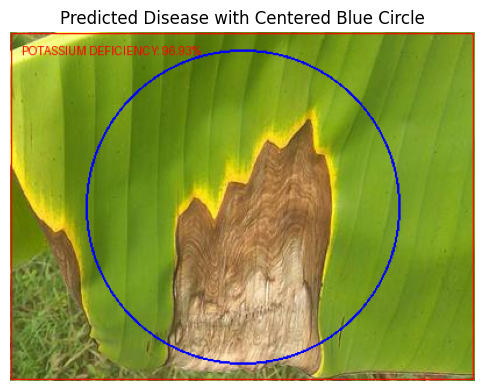

In [63]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# ✅ Step 1: Define the path to your image
img_path = '/content/sample5.jpg'  # Replace with your image path

# ✅ Step 2: Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_expanded = np.expand_dims(img_array, axis=0)

# ✅ Step 3: Predict the class
predictions = model.predict(img_expanded)
predicted_class_index = np.argmax(predictions)
confidence = predictions[0][predicted_class_index] * 100
predicted_class_name = class_names[predicted_class_index]

# ✅ Step 4: Load original image for annotation
original_image = Image.open(img_path).convert("RGB")
draw = ImageDraw.Draw(original_image)

# ✅ Step 5: Font setup
try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 24)
except:
    font = ImageFont.load_default()

# ✅ Step 6: Draw red border
draw.rectangle(
    [1, 1, original_image.width - 2, original_image.height - 2],
    outline="red", width=1
)

# ✅ Step 7: Draw disease name & confidence in top-left
label_text = f"{predicted_class_name}: {confidence:.2f}%"
draw.text((10, 10), label_text, fill="red", font=font)

# ✅ Step 8: Draw thin blue circle in center
center_x, center_y = original_image.width // 2, original_image.height // 2
radius = int(min(original_image.width, original_image.height) * 0.45)  # Big circle
draw.ellipse(
    [(center_x - radius, center_y - radius), (center_x + radius, center_y + radius)],
    outline="blue",
    width=2  # Thin line
)

# ✅ Step 9: Display final output
plt.figure(figsize=(6, 6))
plt.imshow(original_image)
plt.axis("off")
plt.title("Predicted Disease with Centered Blue Circle")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


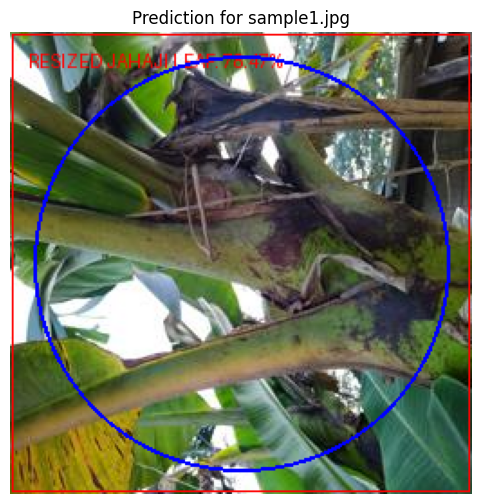

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


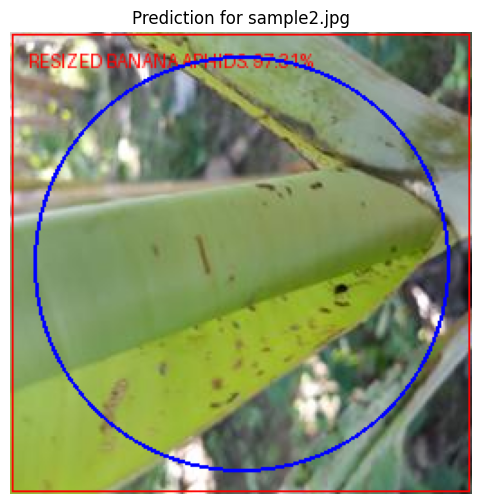

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


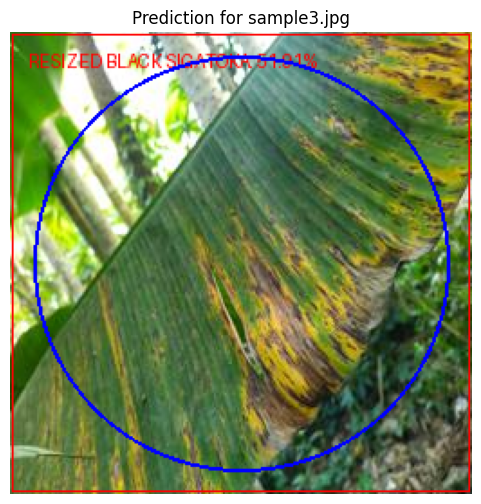

In [64]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# ✅ List of images to test
image_paths = [
    '/content/sample1.jpg',
    '/content/sample2.jpg',
    '/content/sample3.jpg'
]

for img_path in image_paths:
    # Step 1: Load and preprocess
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_expanded = np.expand_dims(img_array, axis=0)

    # Step 2: Predict
    predictions = model.predict(img_expanded)
    predicted_class_index = np.argmax(predictions)
    confidence = predictions[0][predicted_class_index] * 100
    predicted_class_name = class_names[predicted_class_index]

    # Step 3: Load original image for annotation
    original_image = Image.open(img_path).convert("RGB")
    draw = ImageDraw.Draw(original_image)

    # Step 4: Font setup
    try:
        font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 24)
    except:
        font = ImageFont.load_default()

    # Step 5: Draw red border
    draw.rectangle(
        [1, 1, original_image.width - 2, original_image.height - 2],
        outline="red", width=1
    )

    # Step 6: Draw prediction label
    label_text = f"{predicted_class_name}: {confidence:.2f}%"
    draw.text((10, 10), label_text, fill="red", font=font)

    # Step 7: Draw blue circle at center
    center_x, center_y = original_image.width // 2, original_image.height // 2
    radius = int(min(original_image.width, original_image.height) * 0.45)
    draw.ellipse(
        [(center_x - radius, center_y - radius), (center_x + radius, center_y + radius)],
        outline="blue", width=2
    )

    # Step 8: Show output
    plt.figure(figsize=(6, 6))
    plt.imshow(original_image)
    plt.axis("off")
    plt.title(f"Prediction for {img_path.split('/')[-1]}")
    plt.show()
